In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Linear regression

1. init
2. fit
3. predict

In [115]:
class LinearRegression:
    
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr=lr
        self.n_iters=n_iters

        
    def fit(self, X, y):
        # define input/output size function
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # FP and BP
        for _ in range(n_samples):
            y_predicted = np.dot(X, self.weights)+self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted-y))
            db = (1/n_samples) * np.sum(y_predicted-y)
            
            self.weights -=self.lr*dw
            self.bias -=self.lr*db
    # Prediction
    def predict(self,X):
        y_predicted = np.dot(X, self.weights)+self.bias
        return y_predicted 

In [141]:
X=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
X

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [134]:
n_sample, n_feature = X.shape

In [140]:
n_weight=np.zeros(n_feature)
n_weight

array([0., 0., 0., 0.])

In [139]:
y_pred=np.dot(X,n_weight)
y_pred

array([0., 0., 0.])

In [144]:
X.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [143]:
np.dot(X.T,y_pred)

array([0., 0., 0., 0.])

#### Dataset

In [113]:
X, y = datasets.make_regression(n_samples=100, n_features=2, noise=20)

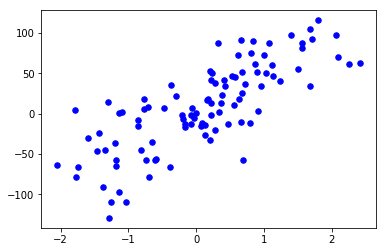

In [114]:
plt.scatter(X[:,0],y, color= 'b', s=30)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [95]:
X.shape

(100, 1)

In [96]:
regressor=LinearRegression()

In [97]:
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [98]:
predicted

array([-37.13438306, -16.57553975, -37.31057349,   6.4167544 ,
         9.09343204,  -1.99690281,  32.15185588,  25.6994781 ,
       -22.12321381,  18.13099815,  -5.3410238 ,  -2.04200127,
         6.30649794,   8.2714192 ,  14.17574283, -11.64744458,
         3.39124453,  14.04944221,   5.71866083,  -7.69468017])

In [99]:
def mse(y_true,predicted):
    return np.mean((y_true-predicted)**2)

In [100]:
mse_v=mse(y_test,predicted)

In [101]:
mse_v

351.380836110833

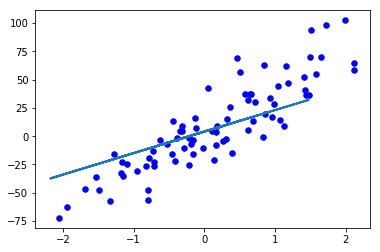

In [108]:
plt.scatter(X_train,y_train, color= 'b', s=30)
plt.plot(X_test,predicted, linewidth=2)